# Задача А

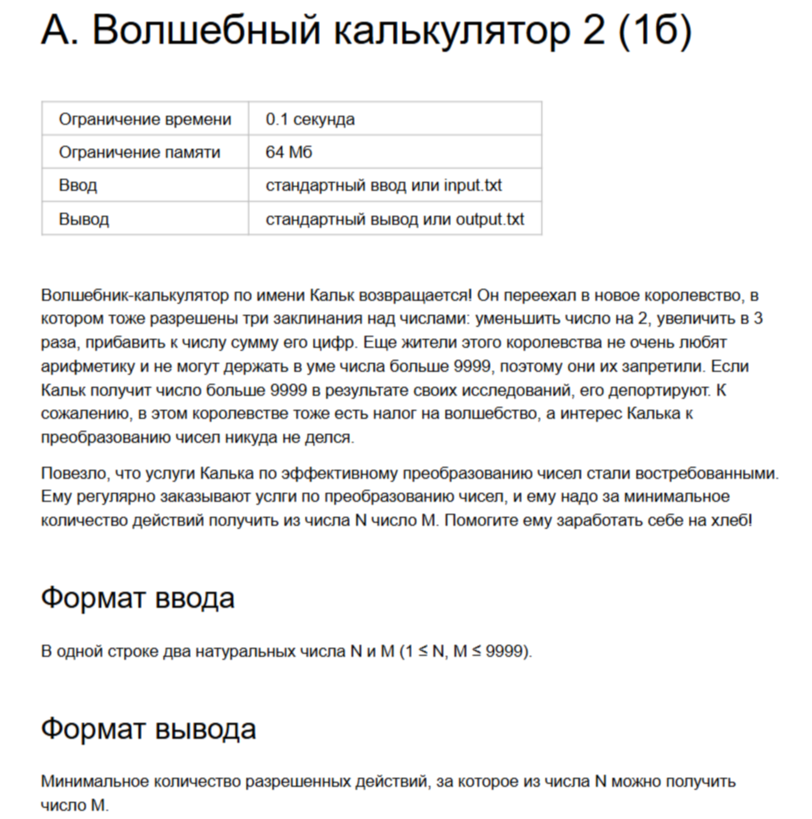

Сравните:

In [67]:
def sum_prts(x):
    y = 0
    while x > 0:
        y += x % 10
        x //= 10
    return y

x = 225
print(sum_prts(x))

9


In [27]:
x = 225
print(sum(map(int, str(x))))

9


Сравните:

In [45]:
def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y)
    ]
    return neighbors

print(get_neighbors(14))

[12, 42, 19]


In [47]:
def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y)
    ]
    return [neighbors]

print(get_neighbors(14))

[[12, 42, 19]]


In [40]:
def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y)
    ]
    return [num for num in neighbors]

print( get_neighbors(14))

[12, 42, 19]


In [49]:
def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y)
    ]
    return [num for num in neighbors if num < 20]

print( get_neighbors(14))

[12, 19]


In [72]:
def get_neighbors(y):
    return [y - 2, y * 3, y + sum_prts(y)]

print( get_neighbors(14))

[12, 42, 19]


### Далее код задачи

Как бы мы это реализовывали с библиотеками

In [60]:
from collections import deque

def sum_prts(x):
    return sum(map(int, str(x)))

def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y)]
    return neighbors

def bfs(start, goal):
    visited = set()
    queue = deque([(start, 0)])  #  (число, количество операций)
    while queue:
        print(queue)
        node, steps = queue.popleft()
        # Если достигли цели, возвращаем количество операций
        if node == goal:
            return steps
        # Если число уже посещено, пропускаем его
        if node in visited:
            continue
        # Добавляем текущее число в посещенные
        visited.add(node)
        print(visited)
        # Получаем соседей и добавляем их в очередь
        for neighbor in get_neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor, steps + 1))

N, M = map(int, input().split())
print(bfs(N, M))

 14 15


deque([(14, 0)])
{14}
deque([(12, 1), (42, 1), (19, 1)])
{12, 14}
deque([(42, 1), (19, 1), (10, 2), (36, 2), (15, 2)])
{42, 12, 14}
deque([(19, 1), (10, 2), (36, 2), (15, 2), (40, 2), (126, 2), (48, 2)])
{42, 19, 12, 14}
deque([(10, 2), (36, 2), (15, 2), (40, 2), (126, 2), (48, 2), (17, 2), (57, 2), (29, 2)])
{10, 42, 12, 14, 19}
deque([(36, 2), (15, 2), (40, 2), (126, 2), (48, 2), (17, 2), (57, 2), (29, 2), (8, 3), (30, 3), (11, 3)])
{36, 10, 42, 12, 14, 19}
deque([(15, 2), (40, 2), (126, 2), (48, 2), (17, 2), (57, 2), (29, 2), (8, 3), (30, 3), (11, 3), (34, 3), (108, 3), (45, 3)])
2


это не оптимально, обратите внимание, 15 уже нашлось, но код продолжает работать

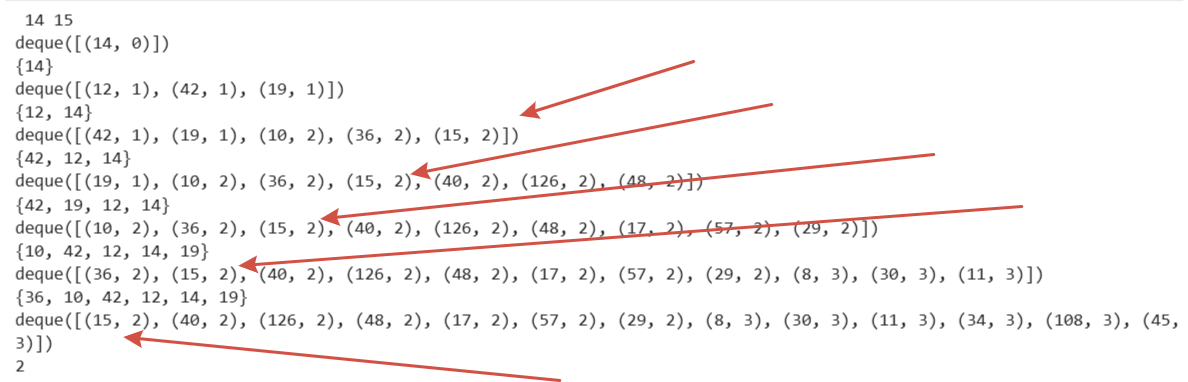

In [64]:
from collections import deque

def sum_prts(x):
    return sum(map(int, str(x)))

def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y) ]
    return neighbors

def bfs(start, goal):
    if start == goal:  # поменяли что мы тут?
        return 0
    visited = set()
    queue = deque([(start, 0)])
    visited.add(start)
    while queue:
        print(queue)
        node, steps = queue.popleft()
        for neighbor in get_neighbors(node):
            if neighbor == goal:  # А это зачем?
                return steps + 1
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, steps + 1))
    
N, M = map(int, input().split())
print(bfs(N, M))

 14 15


deque([(14, 0)])
deque([(12, 1), (42, 1), (19, 1)])
2


In [62]:
def sum_prts(x):
    y = 0
    while x > 0:
        y += x % 10
        x //= 10
    return y

def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y)]
    return neighbors

def bfs(start, goal):
    if start == goal:
        return 0
    visited = set()
    queue = [(start, 0)]  # вместо deque
    visited.add(start)
    while queue:
        node, steps = queue.pop(0)  # Используем pop(0) вместо popleft()
        for neighbor in get_neighbors(node):
            if neighbor == goal:
                return steps + 1
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, steps + 1))

N, M = map(int, input().split())
print(bfs(N, M))

 9 3


3


 list.pop(0) — это O(n), а list.pop() — это O(1)

оптимизируем еще

эта проходит тесты, подумайте, почему?

In [8]:
def sum_prts(x):
    y = 0
    while x > 0:
        y += x % 10
        x //= 10
    return y

def get_neighbors(y):
    neighbors = [
        y - 2,
        y * 3,
        y + sum_prts(y)]
    return neighbors

def bfs(start, goal):
    if start == goal:
        return 0
    visited = set()
    queue = [(start, 0)]
    visited.add(start)
    index = 0  
    while index < len(queue):
        node, steps = queue[index]
        index += 1  
        for neighbor in get_neighbors(node):
            if neighbor == goal:
                return steps + 1
            if 1 <= neighbor <= 9999 and neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, steps + 1))


N, M = map(int, input().split())
print(bfs(N, M))

 9999 1


4999


# Задача Б

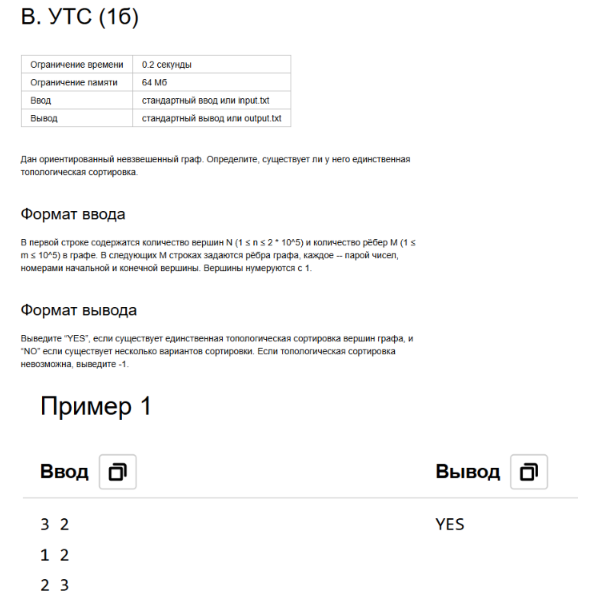

Напомню с прошлого занятия

Топологическая сортировка для ориентированного ациклического графа (Directed Acyclic Graphs, далее DAG) — это линейное упорядочение вершин, для которого выполняется следующее условие — для каждого направленного ребра uv вершина u предшествует вершине v в упорядочении. Если граф не является DAG, то топологическая сортировка для него невозможна.

In [ ]:
def topological_sort_dfs(graph):
    visited = set()  
    stack = [] 
    def dfs(node):
        if node in visited:
            return 
        visited.add(node)
        for neighbor in graph[node]:
            dfs(neighbor)
        stack.append(node) 
    for node in graph:
        if node not in visited:
            dfs(node)

    return stack[::-1] 
print(topological_sort_dfs(graph))

Далее сама задача (топологическую сортировку вспомнили)

 индексы  вершин от 1 до n.

In [ ]:
можно было бы придумать что-то хитрое и простое из разряда:

In [60]:
def super_top_sort(n, edges):
    rank = [0] * (n + 1) 
    visited = set()  
    multiple_paths = set() 
    for u, v in edges:
        if v in visited:
            multiple_paths.add(v)
        visited.add(v)
        rank[v] += 1
    if multiple_paths:
        return "NO"
    if sum(rank) != n - 1:
        return "-1"
    return "YES"

n, m = map(int, input().split())
edges = [tuple(map(int, input().split())) for i in range(m)]

print(super_top_sort(n, edges))

 5 6
 2 4
 1 2
 3 4
 2 3
 4 5
 3 5


NO


оно бы даже работало на части тестов, но есть хитрая ситуация

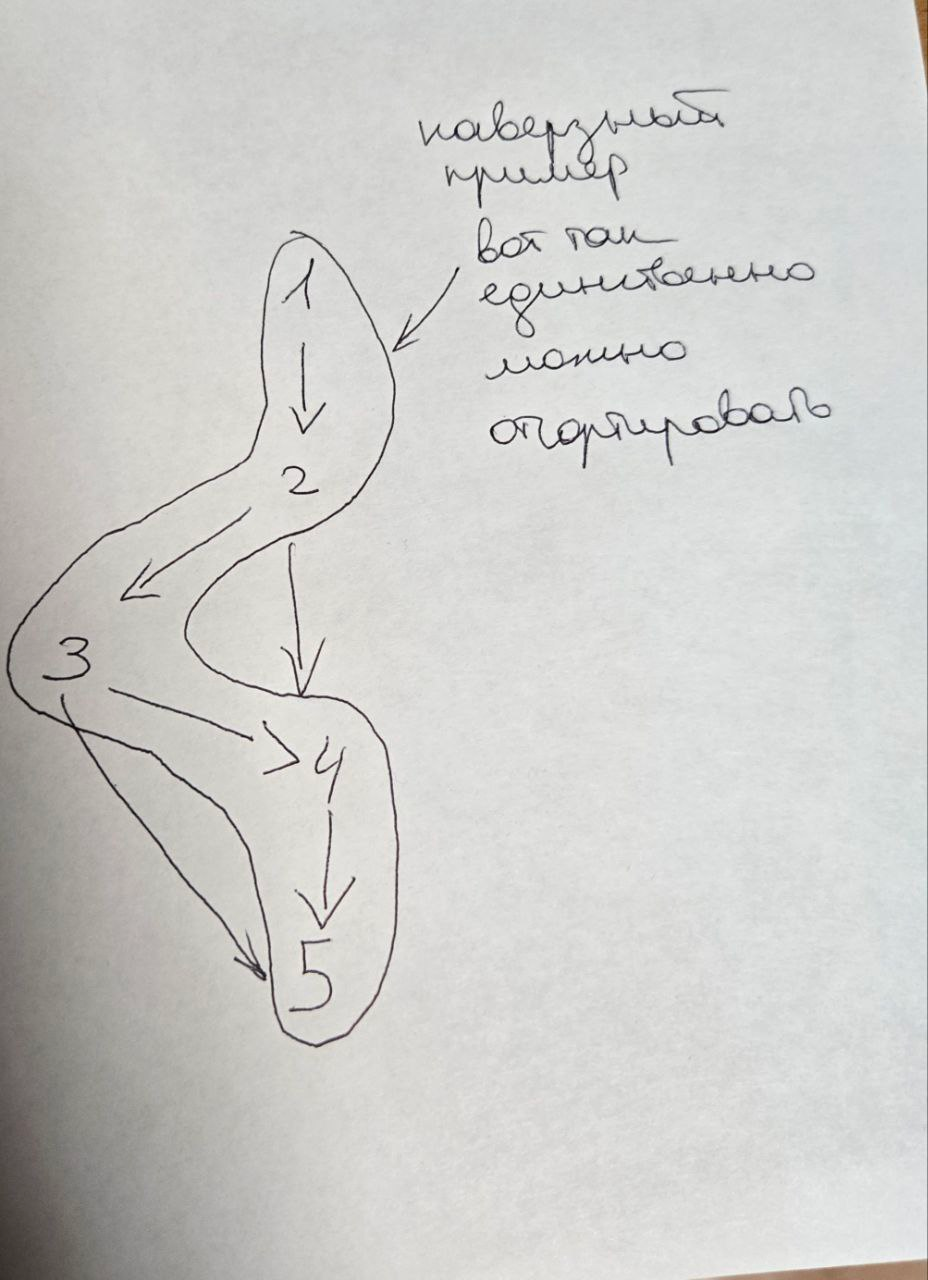

а вот с этим бы работало корректно

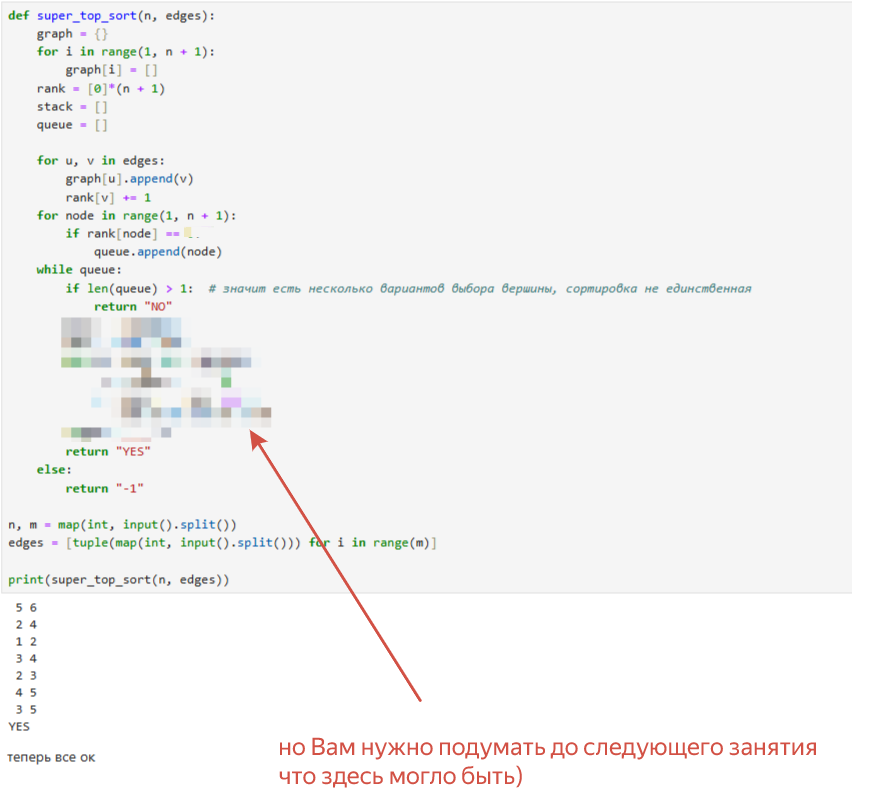